In [1]:
from python_scripts.diversification import RebalSimulation, TriggerSimulation
from python_scripts.dynamic_asset_allocation import DAASimulation
from python_scripts.data_and_descriptives import *

from datetime import date
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#### Import data

[*********************100%%**********************]  5 of 5 completed
c:\Users\germa\Documents\Python\dynamic_asset_allocation\python_scripts\data_and_descriptives.py:101: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='backfill')


using CLOSING PRICES...


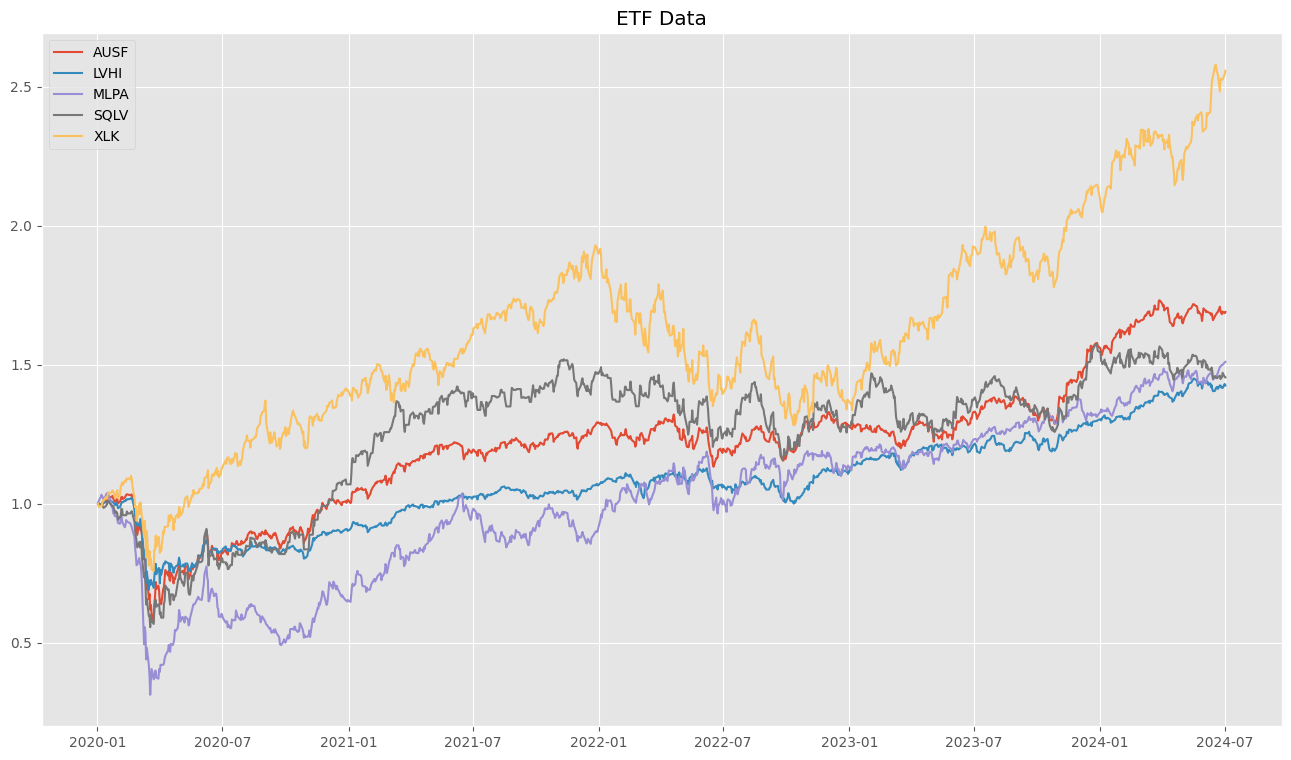

In [2]:
freq = "1d"
tickers = ['AUSF','LVHI', 'SQLV','MLPA','XLK']
start = '2020-01-01' 
end = date.today()
prices = data_yahoo(tickers,freq, start, end, ['Adj Close'], False)
prices = fix_na_data_yahoo(prices)
prices = normalize_data(prices, False, 1, True, True)
returns = prices.pct_change().dropna()

### Backtest of diversification algorithm

##### Try standard rebalancing

Using ew...
using RETURNS...
--- 0.9011383056640625 seconds ---


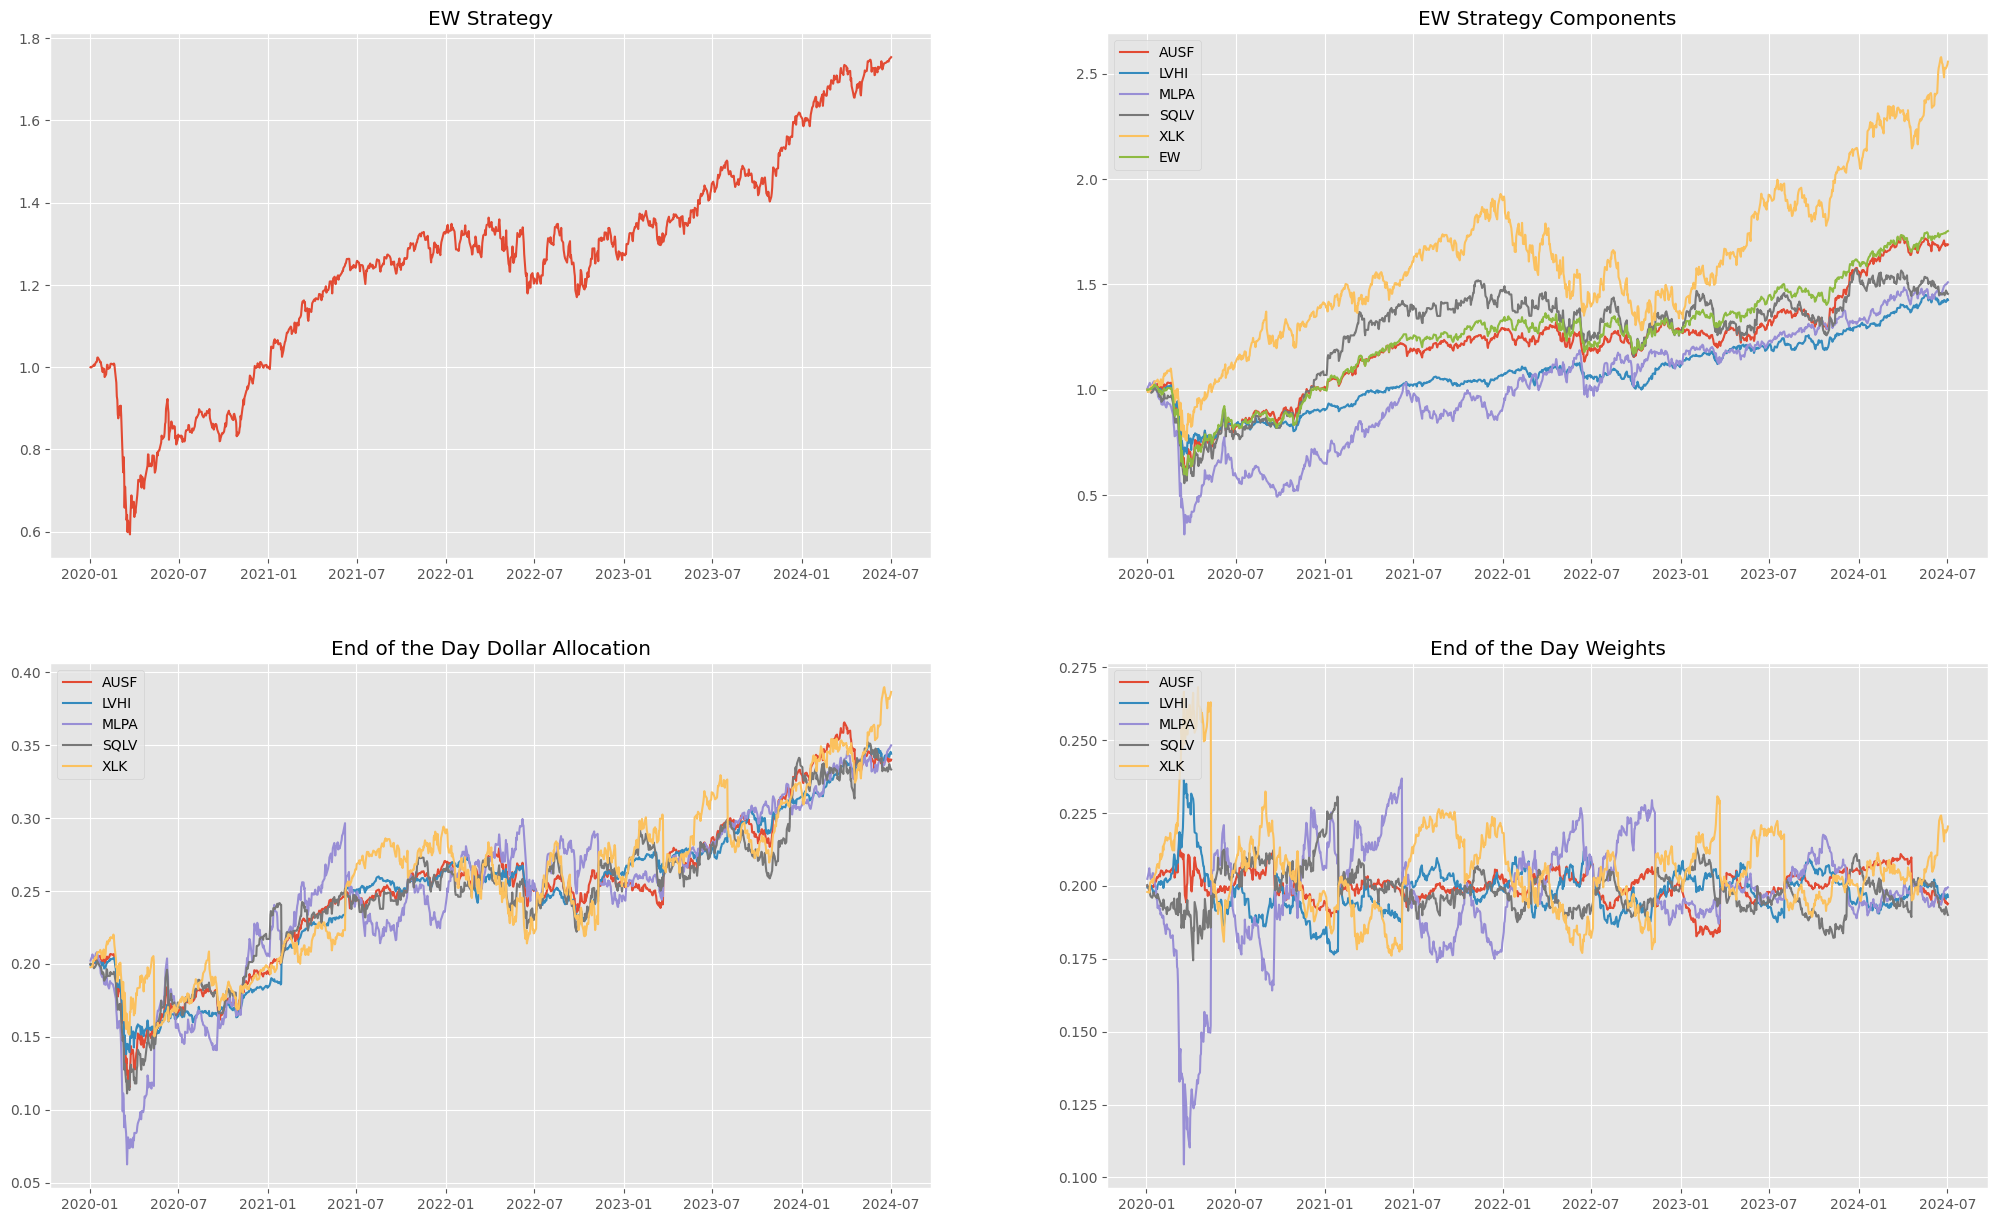

In [4]:
rebal_simulation = RebalSimulation(data=returns, allocation_type='ew', window=0, rebal=90)
backtest_results = rebal_simulation.rebal_simulation()

##### Try rebalancing with stop loss and take profit

backtesting ew_cap_floor strategy using a thresholds (% return) of [0.1, 0.1]
using cash_bank as safe asset...


c:\Users\germa\Documents\Python\dynamic_asset_allocation\python_scripts\diversification.py:249: RuntimeWarning: invalid value encountered in divide
  return (da/da_rebal - 1 > self.threshold[0]) | (da/da_rebal - 1 < -self.threshold[1])
c:\Users\germa\Documents\Python\dynamic_asset_allocation\python_scripts\diversification.py:249: RuntimeWarning: divide by zero encountered in divide
  return (da/da_rebal - 1 > self.threshold[0]) | (da/da_rebal - 1 < -self.threshold[1])


using RETURNS...
--- 0.9113781452178955 seconds ---


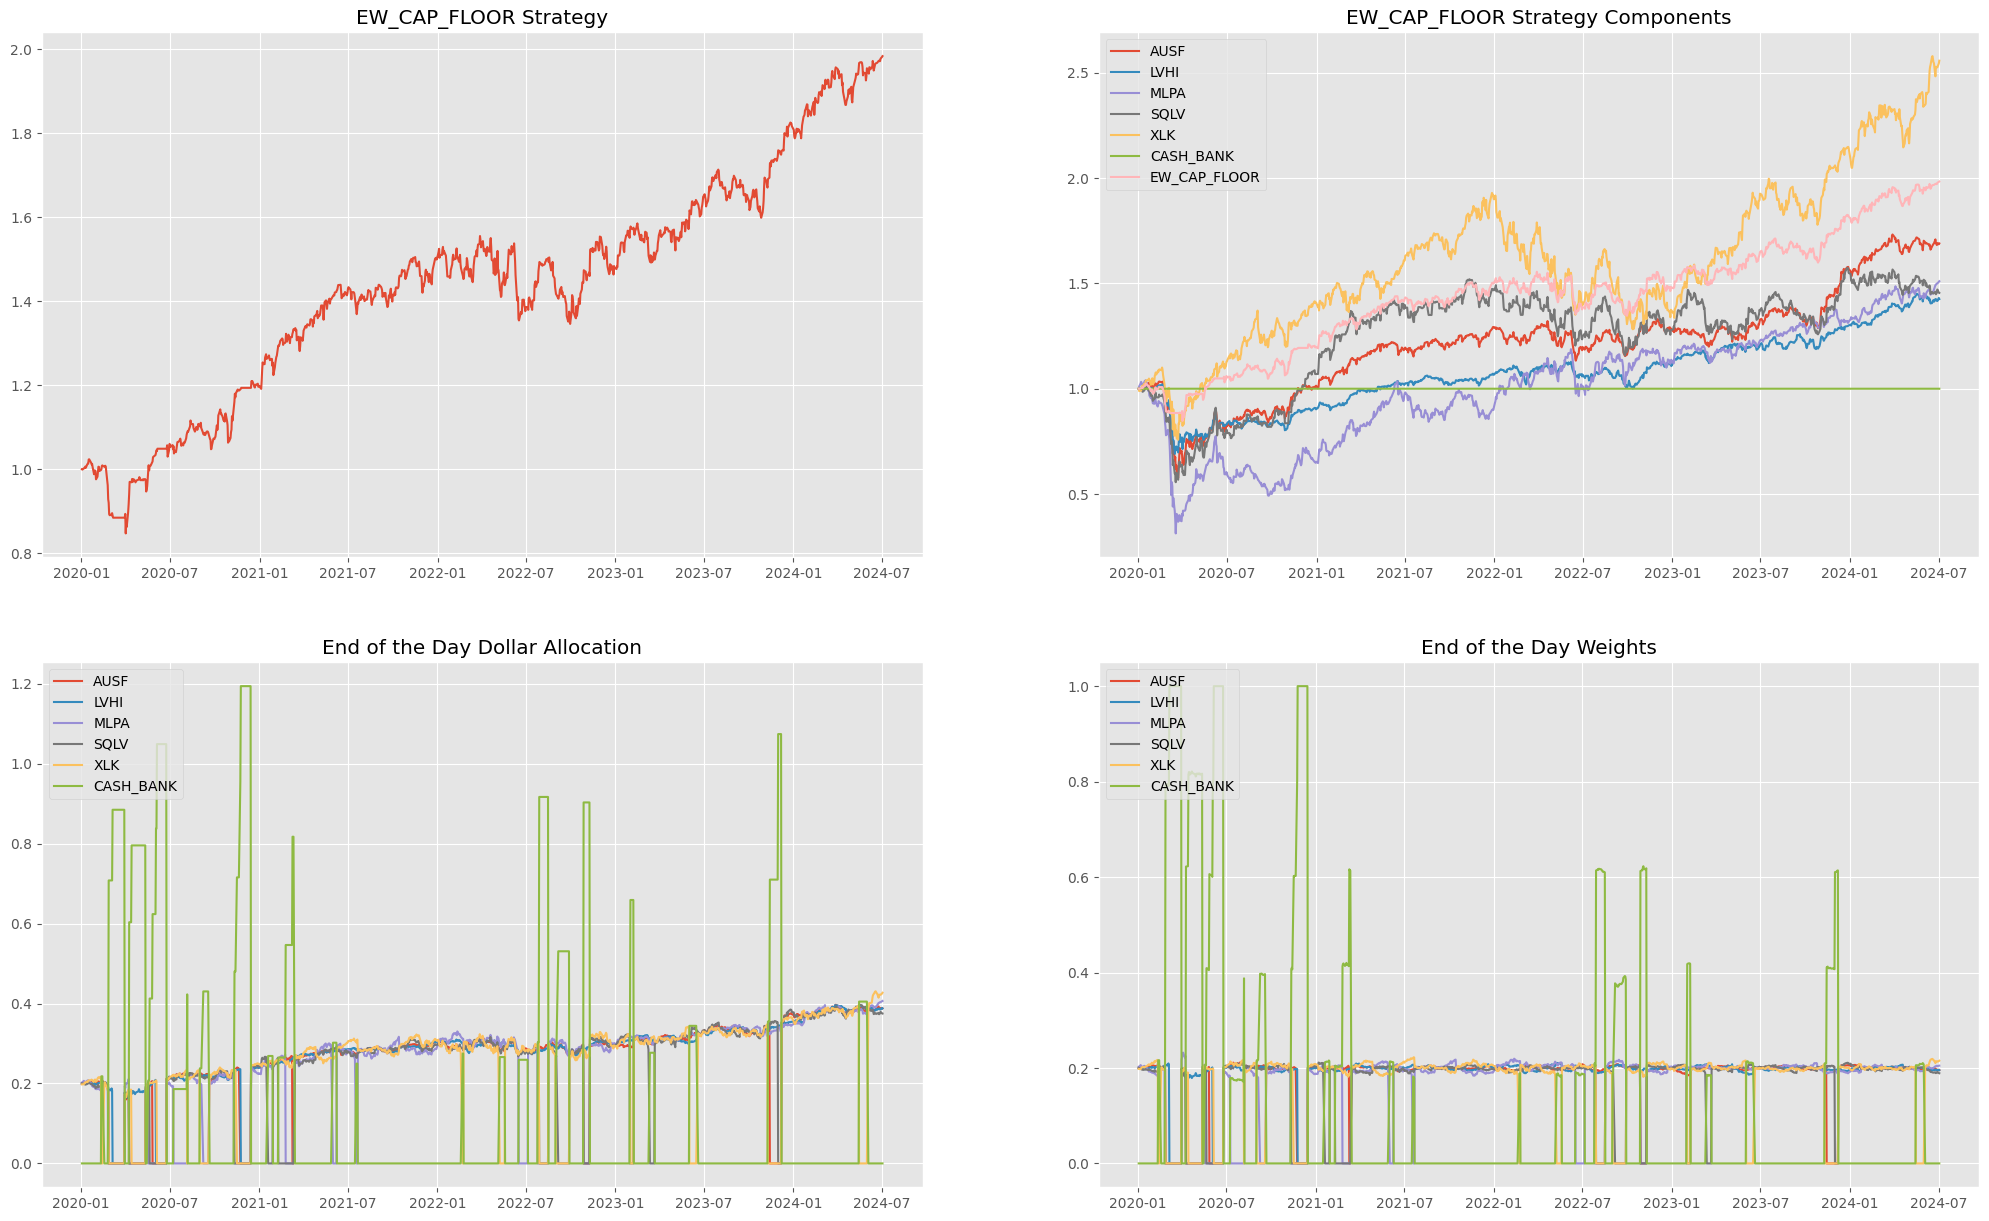

In [5]:
trigger_simulation = TriggerSimulation(returns, allocation_type='ew_cap_floor',safe_asset='cash_bank',
                                       threshold=[0.1,0.1], window=0, rebal = 30)
backtest_results = trigger_simulation.trigger_simulation()

### Dynamic Asset Allocation

In [11]:
m=3.0
start_value=float(1)
kappa=0.8
window=0
rebal = 1
w_bounds=[0,1]
are_returns = True
plot = True

In [6]:
daa = pd.concat([pd.DataFrame(returns['XLK']) , backtest_results['portfolio_value'].pct_change().dropna()], axis = 1)

Summary: 
 strategy: Relative Maximum Drawdown 
 m = 3.0 
 kappa: 0.8 
             rebalancing frequency: 1 
 weight bounds: [0, 1]
using RETURNS...
--- 2.6842265129089355 seconds ---


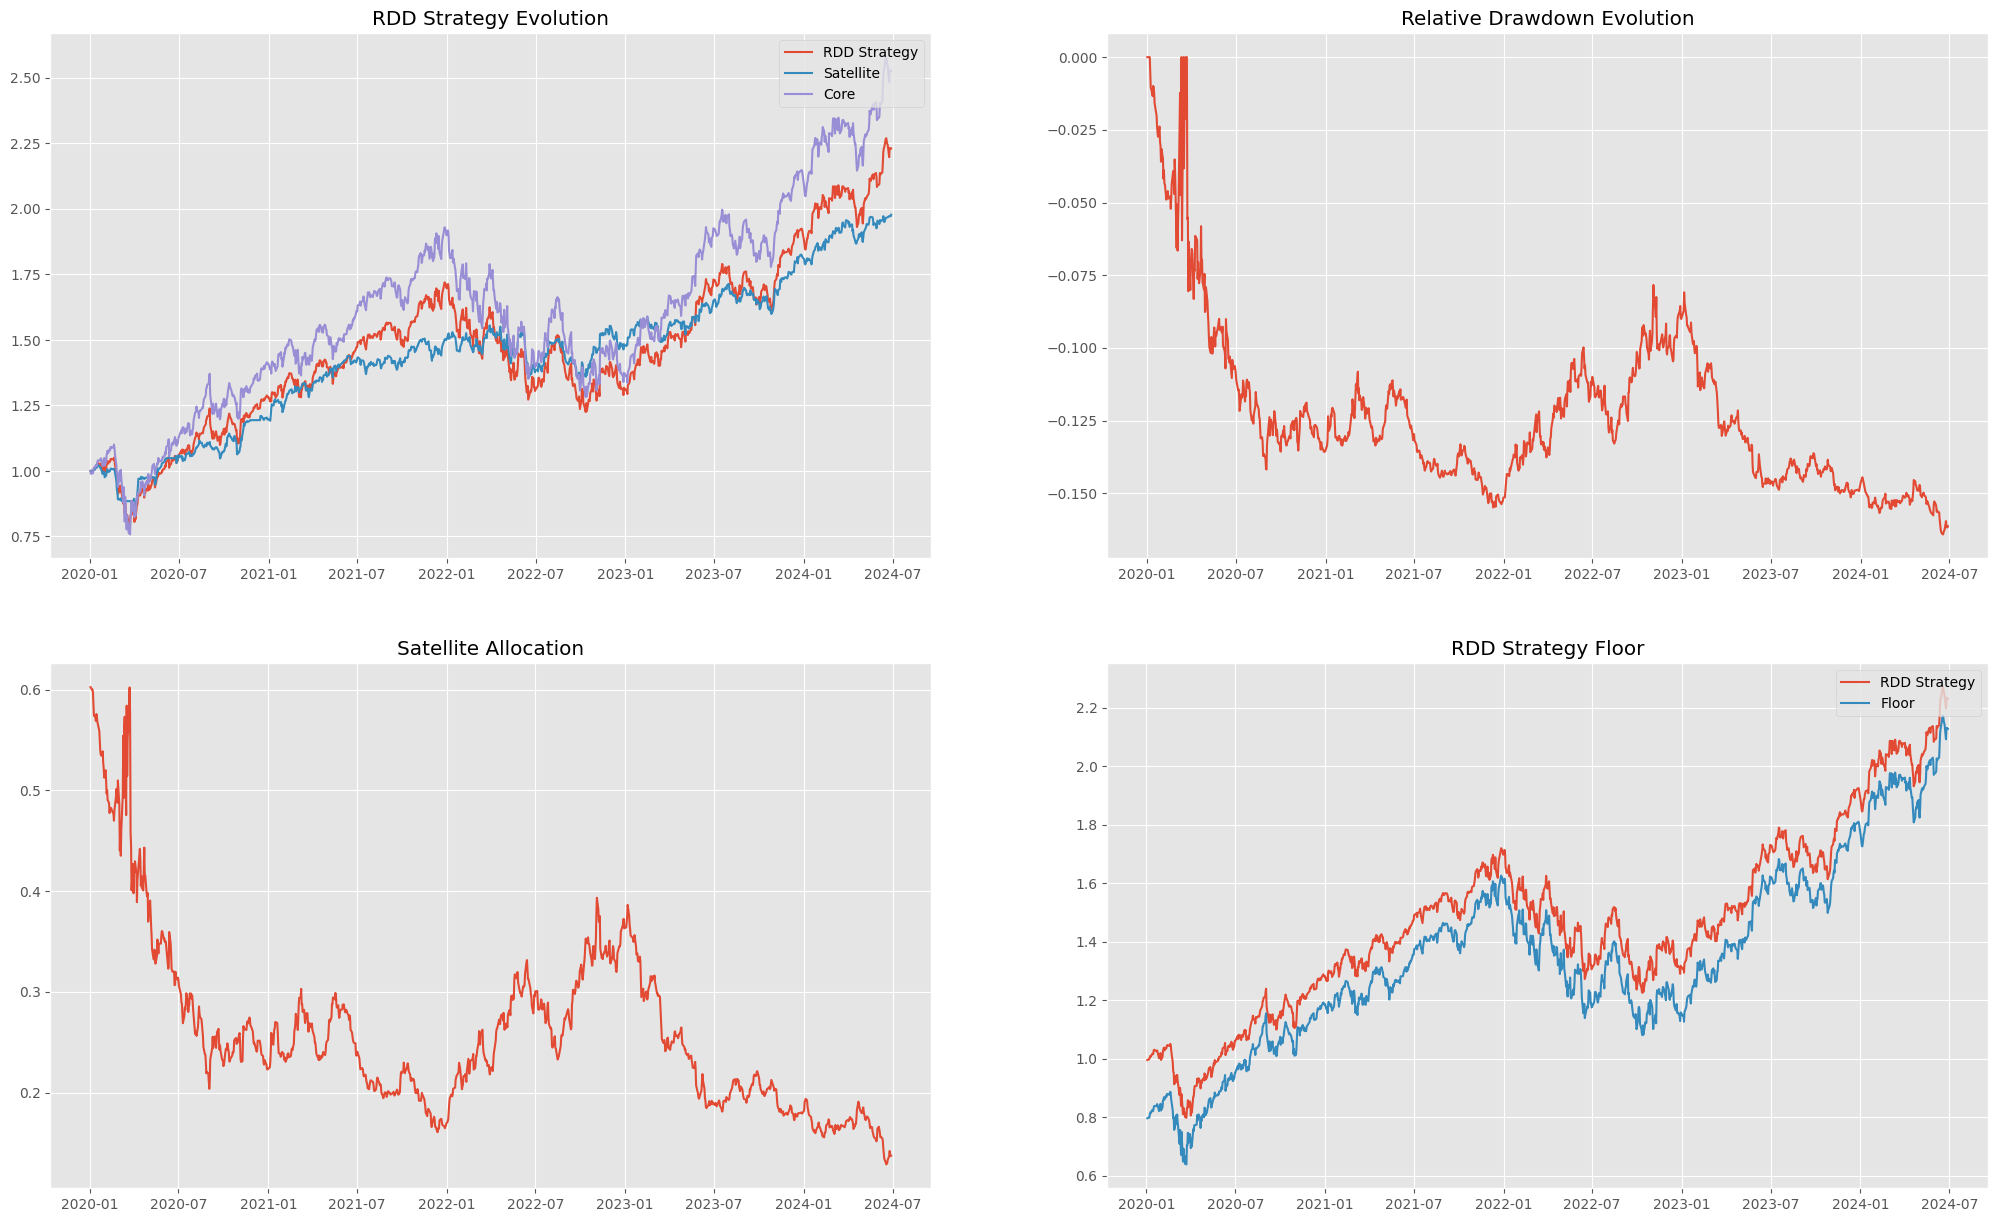

In [13]:
sat_core = False
strategy_type = 'rdd'
strategy_name = strategy_type + '_account'
daa_simulation = DAASimulation(daa, strategy_type, m, kappa, rebal,start_value, window,  sat_core, w_bounds, are_returns, plot)
backtest_result = daa_simulation.daa_simulation()  
results = returns.join(backtest_result['history'][strategy_name].pct_change().dropna(), on = 'Date')

In [14]:
results = performance_metrics(results, ALL_ABS_METRICS, round_to=5)

using RETURNS...
ratio_metric: estimating sharpe_ratio using target of 0.05
value_at_risk: VaR estimated using a cornish_fisher assumption and a confidence level of: 95.0%
ratio_metric: estimating c_f_var_ratio using target of 0.05
value_at_risk: VaR estimated using a cornish_fisher assumption and a confidence level of: 95.0%
value_at_risk: VaR estimated using a sample assumption and a confidence level of: 95.0%
ratio_metric: estimating sample_var_ratio using target of 0.05
value_at_risk: VaR estimated using a sample assumption and a confidence level of: 95.0%
ratio_metric: estimating cvar_ratio using target of 0.05
using RETURNS...
ratio_metric: estimating calmar_ratio using target of 0.05
using RETURNS...
using RETURNS...
ratio_metric: estimating sterling_ratio using target of 0.05
using RETURNS...
using RETURNS...
ratio_metric: estimating burke_ratio using target of 0.05
using RETURNS...
using RETURNS...
ratio_metric: estimating modified_burke_ratio using target of 0.05
using RETURN

,total_return,annualized_returns,annualized_volatility,sharpe_ratio,skewness,kurtosis,normal_test,value_at_risk,c_f_var_ratio,value_at_risk,...,sortino_ratio,kappa_risk_measure,kappa_ratio,gain_loss_ratio,upside_potential_ratio,omega_ratio_sum_approx,omega_ratio_put_option,sortino_ratio,kappa_ratio,sharpe_ratio
AUSF,0.69169,0.12451,0.22712,0.31247,-0.78279,18.65476,0.0,0.01972,3.59845,0.01723,...,0.69854,0.26505,0.26804,1.08968,0.04472,1.08968,1.09164,0.00369,0.00142,0.02623
LVHI,0.41659,0.08083,0.16554,0.17741,-1.83684,24.28515,0.0,0.01582,1.85592,0.01331,...,0.33029,0.24625,0.11940,1.05604,0.03586,1.05604,1.05766,0.00191,0.00069,0.01630
MLPA,0.49996,0.09472,0.36159,0.11776,-2.22870,38.81639,0.0,0.02991,1.42387,0.02402,...,0.32640,0.32592,0.13071,1.06818,0.05234,1.06818,1.06917,0.00335,0.00134,0.01917
SQLV,0.47124,0.09000,0.27588,0.13810,0.08725,6.67978,0.0,0.02425,1.57085,0.02552,...,0.34944,0.26545,0.14373,1.05496,0.05249,1.05496,1.05607,0.00274,0.00113,0.01722
XLK,1.52608,0.22978,0.28263,0.60590,-0.14555,7.62911,0.0,0.02520,6.79439,0.02568,...,1.54450,0.26857,0.63851,1.13368,0.05991,1.13368,1.13573,0.00709,0.00293,0.04416
cash_bank,0.00000,0.00000,0.00000,-inf,NaN,NaN,NaN,NaN,NaN,-0.00000,...,-54.33718,0.05785,-5.20019,0.00000,0.00000,0.00000,-251.02430,-0.22091,-0.02114,-inf
rdd_account,1.23070,0.19612,0.21899,0.63557,-0.23197,2.26978,0.0,0.02130,6.53330,0.02096,...,1.41931,0.24067,0.57961,1.12723,0.05506,1.12723,1.12960,0.00625,0.00255,0.04440


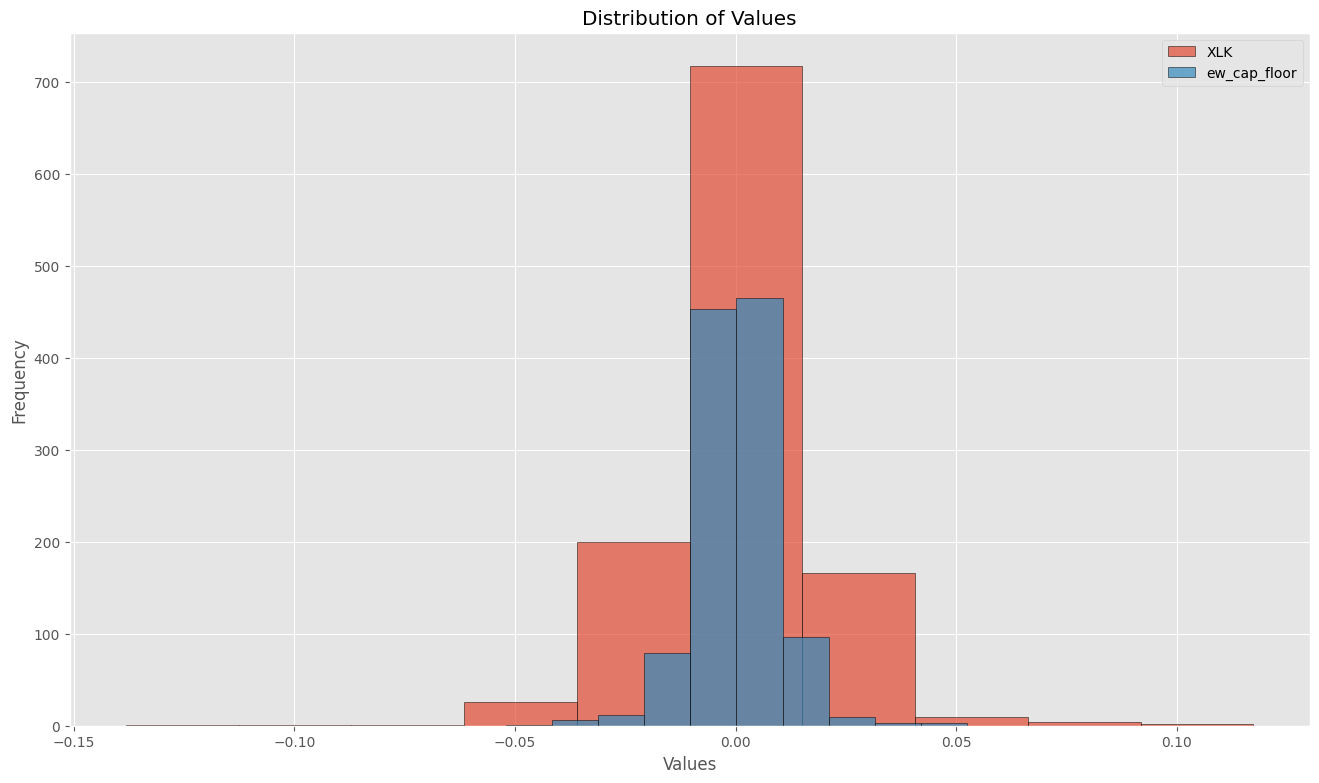

In [15]:
plot_distribution(daa,overlap=True)